In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('Train.csv')

df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [27]:
df.shape

(8068, 11)

In [28]:
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [29]:
df.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [30]:
# filling categorical columns

missing_cat_cols = ['Ever_Married' , 'Graduated' , 'Profession' , 'Var_1']

for col in missing_cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [31]:
df[missing_cat_cols].isna().sum()

Ever_Married    0
Graduated       0
Profession      0
Var_1           0
dtype: int64

In [32]:
# filling numerical columns

missing_num_cols = ['Work_Experience' , 'Family_Size']

for col in missing_num_cols:
    df[col] = df[col].fillna(df[col].mean())

In [33]:
df[missing_num_cols].isna().sum()

Work_Experience    0
Family_Size        0
dtype: int64

In [34]:
# Remove Irrelevant Features
df = df.drop('ID' , axis = 1)

In [35]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,A


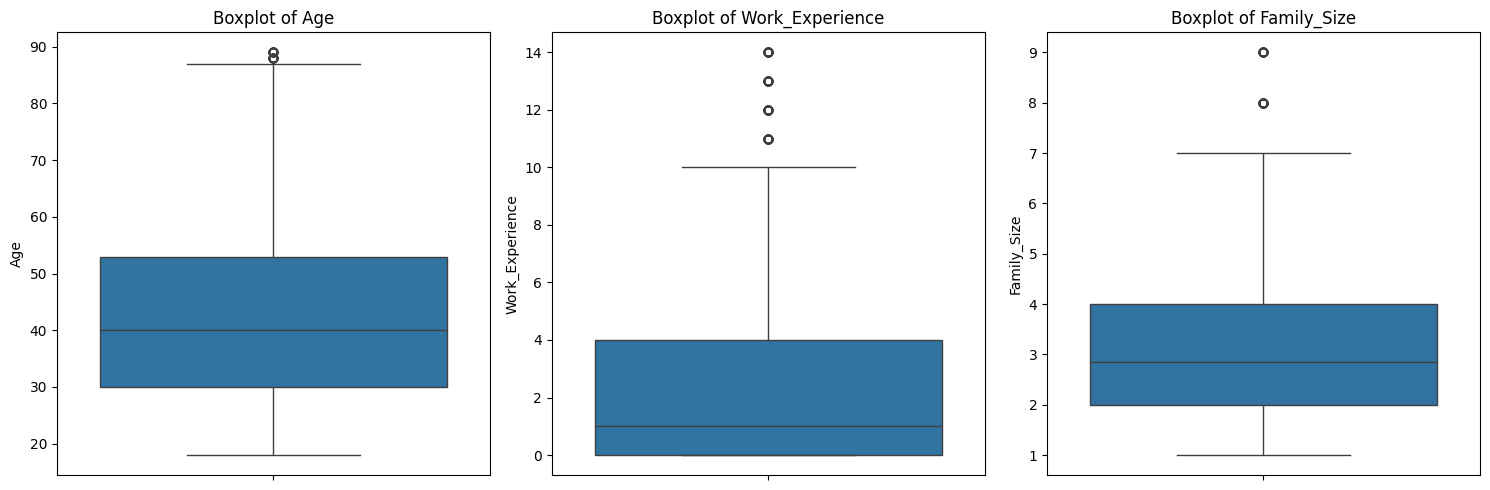

In [36]:
numerical_cols = ['Age', 'Work_Experience', 'Family_Size']
plt.figure(figsize=(15, 5))

for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [37]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Removing outliers
df_cleaned = remove_outliers(df, numerical_cols)

In [38]:
df_cleaned.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,A


In [39]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

# Binary encoding
df_cleaned['Gender'] = df_cleaned['Gender'].map({'Male': 1, 'Female': 0})
df_cleaned['Ever_Married'] = df_cleaned['Ever_Married'].map({'Yes': 1, 'No': 0})
df_cleaned['Graduated'] = df_cleaned['Graduated'].map({'Yes': 1, 'No': 0})

# Ordinal encoding for Spending_Score
spending_order = ['Low', 'Average', 'High']
df_cleaned['Spending_Score'] = OrdinalEncoder(categories=[spending_order]).fit_transform(df_cleaned[['Spending_Score']])

# One-hot encoding for Profession and Var_1
df_cleaned = pd.get_dummies(df_cleaned, columns=['Profession', 'Var_1'], drop_first=True)

In [40]:
df_cleaned.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Doctor,Profession_Engineer,...,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,0,22,0,1.000000,0.0,4.0,D,False,False,...,True,False,False,False,False,False,True,False,False,False
1,0,1,38,1,2.641663,1.0,3.0,A,False,True,...,False,False,False,False,False,False,True,False,False,False
2,0,1,67,1,1.000000,0.0,1.0,B,False,True,...,False,False,False,False,False,False,False,False,True,False
3,1,1,67,1,0.000000,2.0,2.0,B,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0,1,40,1,2.641663,2.0,6.0,A,False,False,...,False,False,False,False,False,False,False,False,True,False


In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_cleaned['Age'] = scaler.fit_transform(df_cleaned[['Age']])

In [42]:
df_cleaned.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Doctor,Profession_Engineer,...,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,0,0.057971,0,1.000000,0.0,4.0,D,False,False,...,True,False,False,False,False,False,True,False,False,False
1,0,1,0.289855,1,2.641663,1.0,3.0,A,False,True,...,False,False,False,False,False,False,True,False,False,False
2,0,1,0.710145,1,1.000000,0.0,1.0,B,False,True,...,False,False,False,False,False,False,False,False,True,False
3,1,1,0.710145,1,0.000000,2.0,2.0,B,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0,1,0.318841,1,2.641663,2.0,6.0,A,False,False,...,False,False,False,False,False,False,False,False,True,False


# Possibilistic C-Means (PCM)

In [43]:
def euclidean_distance(X, C):
    return np.linalg.norm(X[:, np.newaxis] - C, axis=2) ** 2

def initialize_centroids(X, k):
    indices = np.random.choice(len(X), size=k, replace=False)
    return X[indices]

def update_membership(X, C, gamma, m):
    dist = euclidean_distance(X, C)
    U = 1 / (1 + (dist / gamma[np.newaxis, :]) ** (1 / (m - 1)))
    return U

In [44]:
def update_centroids(X, U, m):
    um = U ** m
    C = (um.T @ X) / np.sum(um.T, axis=1)[:, np.newaxis]
    return C

def update_gamma(U, dist, m, eta):
    um = U ** m
    numerator = np.sum(um * dist, axis=0)
    denominator = np.sum(um, axis=0)
    gamma = eta * (numerator / denominator)
    return gamma

In [45]:
def pcm(X, k, m=2.0, eta=0.5, max_iter=100, tol=1e-4):
    C = initialize_centroids(X, k)
    gamma = np.ones(k)
    prev_C = C.copy()

    for _ in range(max_iter):
        dist = euclidean_distance(X, C)
        U = update_membership(X, C, gamma, m)
        C = update_centroids(X, U, m)
        gamma = update_gamma(U, dist, m, eta)

        # Check for convergence
        if np.linalg.norm(C - prev_C) < tol:
            break
        prev_C = C.copy()

    return C, U

In [46]:
df_cleaned = df_cleaned.drop('Segmentation' , axis = 1)
X = df_cleaned.values.astype(float)

centroids, membership = pcm(X, k=3, m=2.0, eta=0.5, max_iter=100)

# Get hard cluster assignments
labels = np.argmax(membership, axis=1)
df_cleaned['Cluster'] = labels


print("Cluster centroids:\n", centroids)
print("\nSample cluster assignments:\n", df_cleaned['Cluster'].value_counts())

Cluster centroids:
 [[0.59359392 0.71546353 0.41658157 0.74422907 0.82770099 0.57866783
  2.49368008 0.07520875 0.06482974 0.1118579  0.0500563  0.10854395
  0.01006324 0.06800526 0.0237535  0.02712855 0.06740082 0.07901167
  0.00524381 0.79050932 0.01629434]
 [0.59359186 0.71547189 0.41658855 0.7442427  0.82768095 0.57865937
  2.49358569 0.07520743 0.06482893 0.11185662 0.05005374 0.10853441
  0.01006278 0.0680085  0.02375286 0.02712693 0.06739789 0.07900766
  0.00524372 0.79051879 0.01629379]
 [0.59359199 0.71547156 0.41658822 0.74424204 0.8276818  0.57866
  2.4935907  0.0752075  0.06482896 0.11185668 0.05005388 0.10853487
  0.0100628  0.06800833 0.02375289 0.02712701 0.06739803 0.07900786
  0.00524372 0.79051833 0.01629382]]

Sample cluster assignments:
 Cluster
0    6067
1    1603
2      50
Name: count, dtype: int64


In [47]:
from sklearn.decomposition import PCA

def plot_clusters(X, labels, title):
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(X)
    
    plt.figure(figsize=(8, 5))
    scatter = plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap='tab10', s=50)
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.grid(True)
    plt.show()

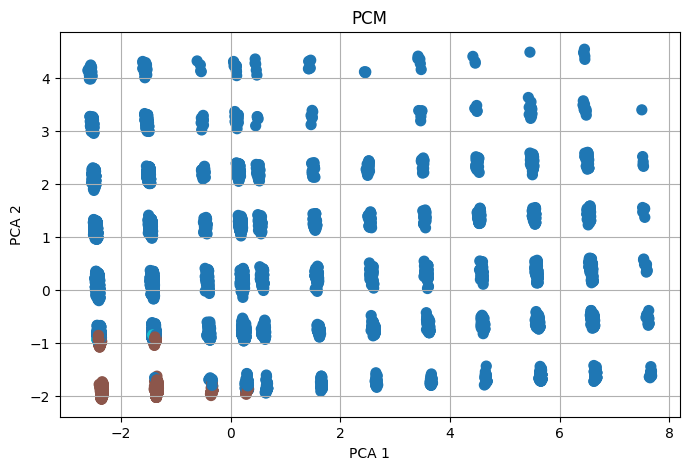

In [49]:
plot_clusters(X , labels , title = 'PCM')